In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
dataset_train=pd.read_csv("traindata.csv")

In [39]:
dataset_train.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [40]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


<AxesSubplot:>

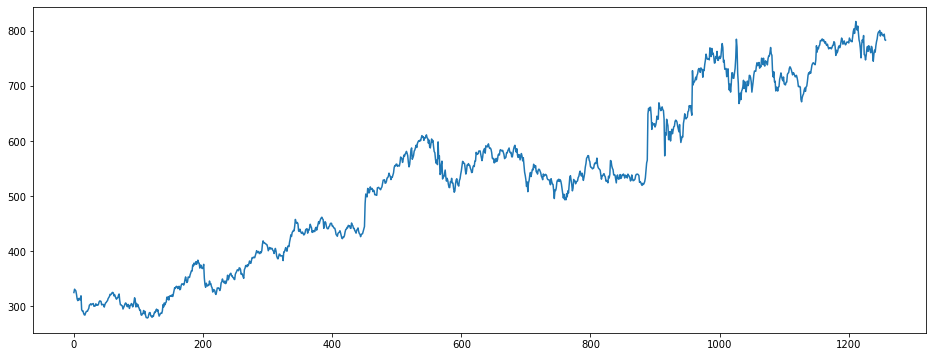

In [41]:
dataset_train['Open'].plot(figsize=(16,6))

In [42]:
dataset_train.rolling(7).mean().head(20)

,Open,High,Low
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,323.002857,325.392857,318.682857
7,321.457143,322.882857,316.841429
8,318.698571,319.801429,314.025714
9,316.552857,317.524286,311.851429


In [43]:
training_set=dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_training_set=scaler.fit_transform(training_set)
scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [45]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train=np.array(X_train)
y_train=np.array(y_train)

In [46]:
print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [47]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1198, 60, 1)

In [48]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [49]:
regressor=Sequential()
#1st layer
regressor.add(LSTM(units=50, return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
#2nd layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
#3rd layer            
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
#4th layer           
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
#output layer              
regressor.add(Dense(units=1))

In [50]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 7s 58ms/step - loss: 0.0332
Epoch 2/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 2s 64ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 2s 56ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0041
Epoch 13/100
38/38 [===

In [51]:
dataset_test=pd.read_csv("testdata.csv")
actual_stock_price=dataset_test.iloc[:,1:2].values

In [52]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

X_test=[]
for i in range(60,300):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [53]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

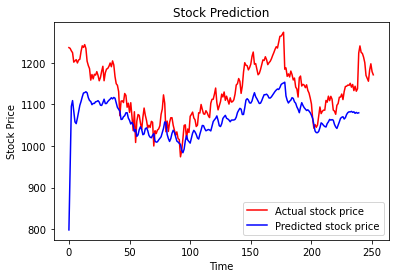

In [54]:
plt.plot(actual_stock_price,color='red',label='Actual stock price')
plt.plot(predicted_stock_price,color='blue',label='Predicted stock price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()